In [1]:
import pandas as pd
import numpy as np

In [2]:
crop=pd.read_csv("Crop_recommendation.csv")

In [3]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.88,82.00,6.50,202.94,rice
1,85,58,41,21.77,80.32,7.04,226.66,rice
2,60,55,44,23.00,82.32,7.84,263.96,rice
3,74,35,40,26.49,80.16,6.98,242.86,rice
4,78,42,42,20.13,81.60,7.63,262.72,rice


In [4]:
crop.shape

(2200, 8)

In [5]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [6]:
crop.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [7]:
crop.duplicated().sum()

np.int64(0)

In [8]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616136,71.481877,6.469445,103.463691
std,36.917334,32.985883,50.647931,5.063700,22.263811,0.773905,54.958311
min,0.000000,5.000000,5.000000,8.830000,14.260000,3.500000,20.210000
25%,21.000000,28.000000,20.000000,22.770000,60.262500,5.970000,64.552500
50%,37.000000,51.000000,32.000000,25.600000,80.470000,6.425000,94.865000
75%,84.250000,68.000000,49.000000,28.560000,89.950000,6.920000,124.270000
max,140.000000,145.000000,205.000000,43.680000,99.980000,9.940000,298.560000


In [9]:
# Drop the non-numeric 'label' column before calculating correlation
numeric_crop = crop.drop('label', axis=1)

# Calculate and display the correlation matrix
display(numeric_crop.corr())

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026501,0.190687,0.096761,0.059021
P,-0.231460,1.000000,0.736232,-0.127538,-0.118732,-0.138022,-0.063840
K,-0.140512,0.736232,1.000000,-0.160389,0.190860,-0.169477,-0.053461
temperature,0.026501,-0.127538,-0.160389,1.000000,0.205326,-0.017919,-0.030082
humidity,0.190687,-0.118732,0.190860,0.205326,1.000000,-0.008502,0.094418
ph,0.096761,-0.138022,-0.169477,-0.017919,-0.008502,1.000000,-0.109167
rainfall,0.059021,-0.063840,-0.053461,-0.030082,0.094418,-0.109167,1.000000


<Axes: >

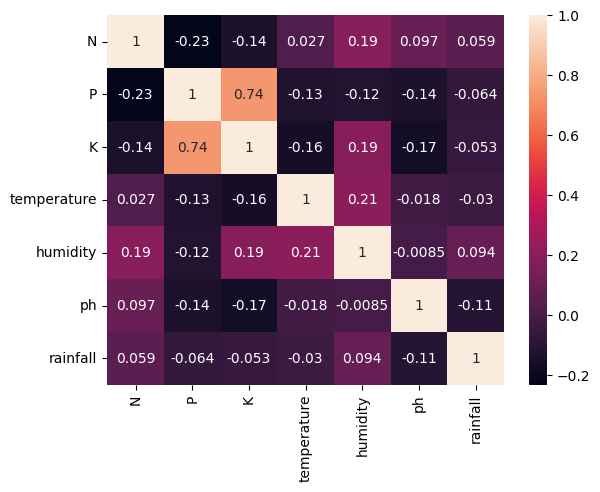

In [10]:
import seaborn as sns
sns.heatmap(numeric_crop.corr(), annot=True, cbar=True)

In [11]:
crop.label.value_counts()

label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64

In [12]:
# Reload the data to get the original DataFrame with the 'label' column
crop_original = pd.read_csv("Crop_recommendation.csv")

# Get the value counts of the 'label' column from the original DataFrame
crop_original['label'].value_counts()

label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64

In [13]:
crop_original['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [14]:
crop_original['label'].unique().size

22

C:\Users\HP\AppData\Local\Temp\ipykernel_31432\2091051290.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(crop['N'])


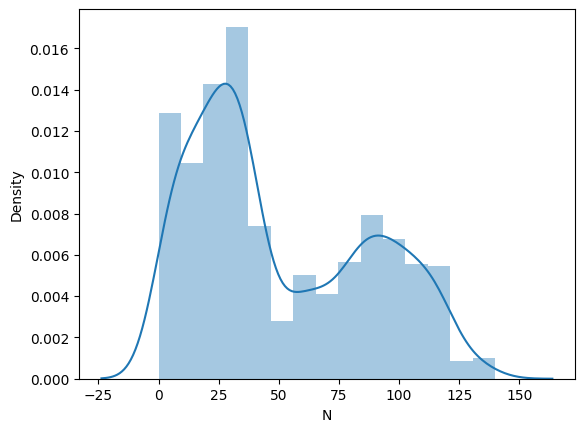

In [15]:
import matplotlib.pyplot as plt
sns.distplot(crop['N'])
plt.show()

In [16]:
crop_original['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [17]:
crop_dict = {
    'rice': 1,
    'maize': 2,
    'jute': 3,
    'cotton': 4,
    'coconut': 5,
    'papaya': 6,
    'orange': 7,
    'apple': 8,
    'muskmelon': 9,
    'watermelon': 10,
    'grapes': 11,
    'mango': 12,
    'banana': 13,
    'pomegranate': 14,
    'lentil': 15,
    'blackgram': 16,
    'mungbean': 17,
    'mothbeans': 18,
    'pigeonpeas': 19,
    'kidneybeans': 20,
    'chickpea': 21,
    'coffee': 22
}
crop_original['crop_num']=  crop_original['label'].map(crop_dict)

In [18]:
crop_original

,N,P,K,temperature,humidity,ph,rainfall,label,crop_num
0,90,42,43,20.88,82.00,6.50,202.94,rice,1
1,85,58,41,21.77,80.32,7.04,226.66,rice,1
2,60,55,44,23.00,82.32,7.84,263.96,rice,1
3,74,35,40,26.49,80.16,6.98,242.86,rice,1
4,78,42,42,20.13,81.60,7.63,262.72,rice,1
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.77,66.41,6.78,177.77,coffee,22
2196,99,15,27,27.42,56.64,6.09,127.92,coffee,22
2197,118,33,30,24.13,67.23,6.36,173.32,coffee,22
2198,117,32,34,26.27,52.13,6.76,127.18,coffee,22


In [19]:
crop_original.head()

,N,P,K,temperature,humidity,ph,rainfall,label,crop_num
0,90,42,43,20.88,82.00,6.50,202.94,rice,1
1,85,58,41,21.77,80.32,7.04,226.66,rice,1
2,60,55,44,23.00,82.32,7.84,263.96,rice,1
3,74,35,40,26.49,80.16,6.98,242.86,rice,1
4,78,42,42,20.13,81.60,7.63,262.72,rice,1


In [20]:
crop_original.crop_num.unique()

array([ 1,  2, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10,  9,  8,  7,
        6,  5,  4,  3, 22])

In [21]:
crop_original.crop_num.value_counts()

crop_num
1     100
2     100
21    100
20    100
19    100
18    100
17    100
16    100
15    100
14    100
13    100
12    100
11    100
10    100
9     100
8     100
7     100
6     100
5     100
4     100
3     100
22    100
Name: count, dtype: int64

In [22]:
# Load data for training on whole dataset
x = crop_original.drop(['label','crop_num'],axis=1)
y = crop_original['crop_num']

In [23]:
x.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.88,82.00,6.50,202.94
1,85,58,41,21.77,80.32,7.04,226.66
2,60,55,44,23.00,82.32,7.84,263.96
3,74,35,40,26.49,80.16,6.98,242.86
4,78,42,42,20.13,81.60,7.63,262.72


In [24]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: crop_num, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [26]:
x_train.shape

(1760, 7)

In [27]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
x_scaled = ms.fit_transform(x)

In [29]:
x_train

array([[0.12142857, 0.07857143, 0.045     , ..., 0.9089898 , 0.48532225,
        0.29685161],
       [0.26428571, 0.52857143, 0.07      , ..., 0.64257946, 0.56594073,
        0.17630752],
       [0.05      , 0.48571429, 0.1       , ..., 0.57005802, 0.58835229,
        0.08931844],
       ...,
       [0.07857143, 0.22142857, 0.13      , ..., 0.43760347, 0.46198144,
        0.28719815],
       [0.07857143, 0.85      , 0.995     , ..., 0.76763665, 0.44420505,
        0.18346657],
       [0.22857143, 0.52142857, 0.085     , ..., 0.56099735, 0.54465022,
        0.11879596]], shape=(1760, 7))

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_final = sc.fit_transform(x_scaled)

C:\Users\HP\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression  with accuracy : 0.9431818181818182
Confusion matrix : 
 [[17  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 16  0  4  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 1  0 19  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 0  1  0 16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0 21  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 

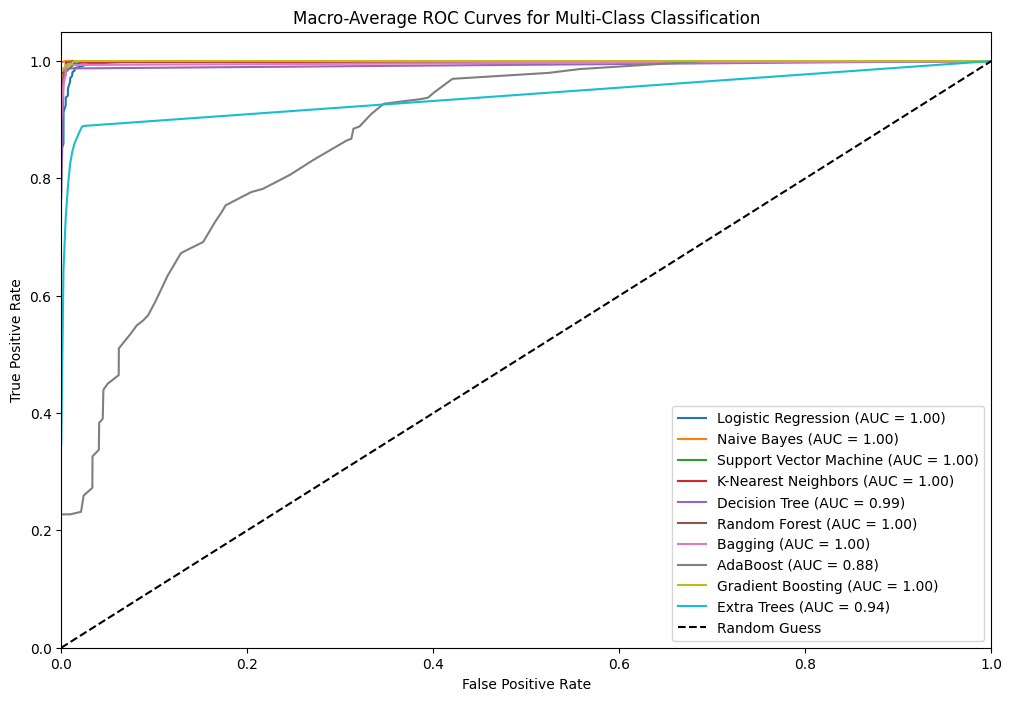

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Binarize the labels for multi-class ROC
y_test_bin = label_binarize(y_test, classes=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22])
n_classes = y_test_bin.shape[1]

# create instances of all models
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(probability=True),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier(),
}

plt.figure(figsize=(12, 8))

for name, model in models.items():
    model.fit(x_train, y_train)
    ypred = model.predict(x_test)
    y_score = model.predict_proba(x_test)
    
    print(f"{name}  with accuracy : {accuracy_score(y_test, ypred)}")
    print("Confusion matrix : \n", confusion_matrix(y_test, ypred))
    print("==========================================================")
    
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    # Compute macro-average ROC curve and ROC area
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    mean_tpr /= n_classes
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    
    plt.plot(fpr["macro"], tpr["macro"], label=f'{name} (AUC = {roc_auc["macro"]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Macro-Average ROC Curves for Multi-Class Classification')
plt.legend(loc="lower right")
plt.show()

In [30]:
# Train RandomForest on whole dataset
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(x_final, y)

# Save the model and scalers
import pickle
pickle.dump(model, open('model.pkl', 'wb'))
pickle.dump(ms, open('minmax_scaler.pkl', 'wb'))
pickle.dump(sc, open('standard_scaler.pkl', 'wb'))

print('Model and scalers saved.')

Model and scalers saved.


In [31]:
def recommendation(N,P,k,temperature,humidity,ph,rainfal):
    features = np.array([[N,P,k,temperature,humidity,ph,rainfal]])
    # Apply MinMax then Standard scaling (same as training)
    scaled = ms.transform(features)
    transformed_features = sc.transform(scaled)
    # Load current model (RandomForest)
    model = pickle.load(open('model.pkl', 'rb'))
    probabilities = model.predict_proba(transformed_features)[0]
    
    # Crop dictionary
    crop_dict = {
        1: "Rice", 2: "Maize", 3: "Jute", 4: "Cotton", 5: "Coconut", 6: "Papaya",
        7: "Orange", 8: "Apple", 9: "Muskmelon", 10: "Watermelon", 11: "Grapes",
        12: "Mango", 13: "Banana", 14: "Pomegranate", 15: "Lentil", 16: "Blackgram",
        17: "Mungbean", 18: "Mothbeans", 19: "Pigeonpeas", 20: "Kidneybeans",
        21: "Chickpea", 22: "Coffee"
    }
    
    # Get top 3
    top_3_indices = np.argsort(probabilities)[-3:][::-1]
    top_3_crops = [crop_dict[idx + 1] for idx in top_3_indices]
    top_3_probs = [probabilities[idx] * 100 for idx in top_3_indices]
    
    print("Top 3 recommended crops:")
    for i, (crop, prob) in enumerate(zip(top_3_crops, top_3_probs), 1):
        print(f"{i}. {crop} ({prob:.1f}%)")
    
    return top_3_crops[0]  # Return top prediction